In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df.duplicated().sum()


np.int64(0)

               area    bedrooms   bathrooms     stories         price
count    545.000000  545.000000  545.000000  545.000000  5.450000e+02
mean    5150.541284    2.965138    1.286239    1.805505  4.766729e+06
std     2170.141023    0.738064    0.502470    0.867492  1.870440e+06
min     1650.000000    1.000000    1.000000    1.000000  1.750000e+06
25%     3600.000000    2.000000    1.000000    1.000000  3.430000e+06
50%     4600.000000    3.000000    1.000000    2.000000  4.340000e+06
75%     6360.000000    3.000000    2.000000    2.000000  5.740000e+06
max    16200.000000    6.000000    4.000000    4.000000  1.330000e+07


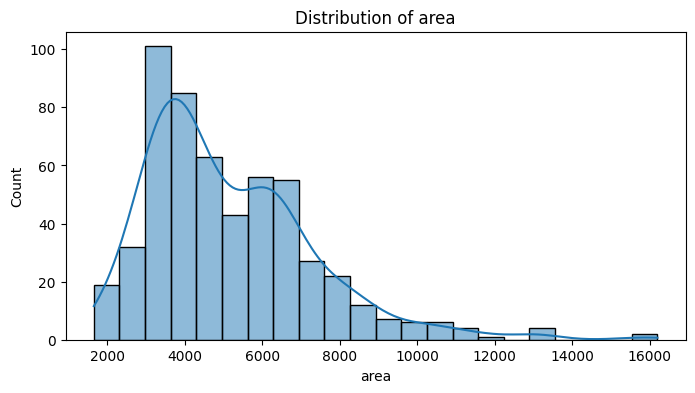

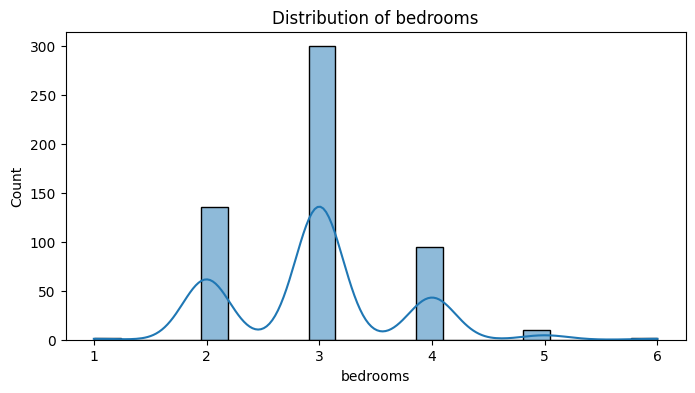

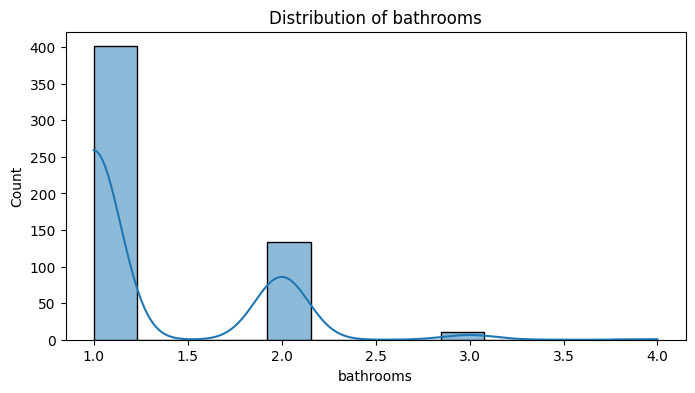

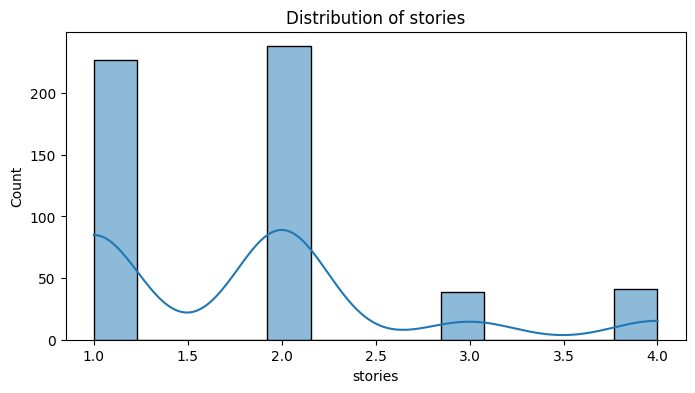

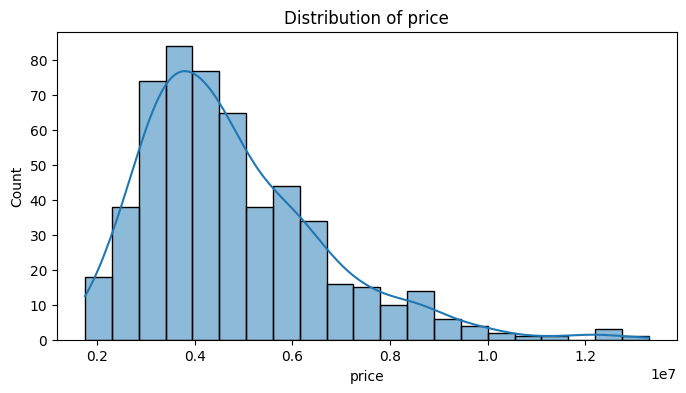

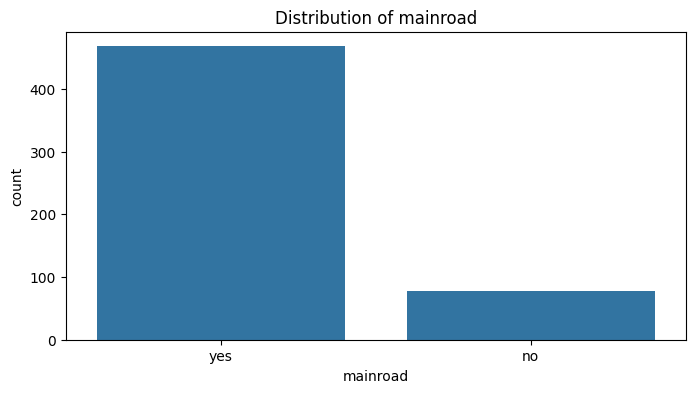

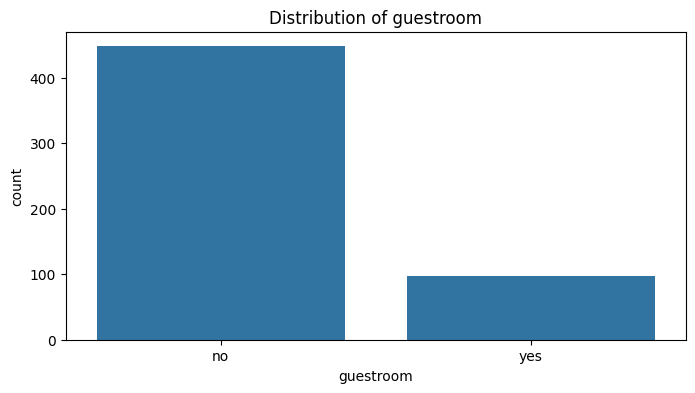

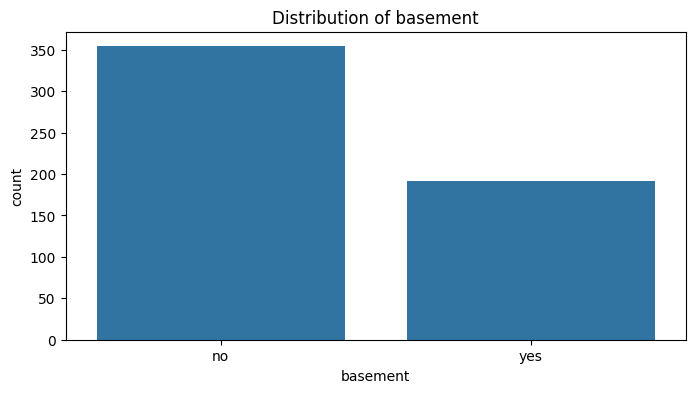

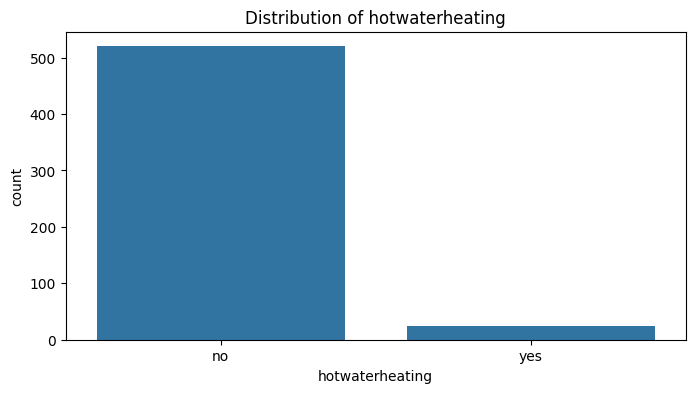

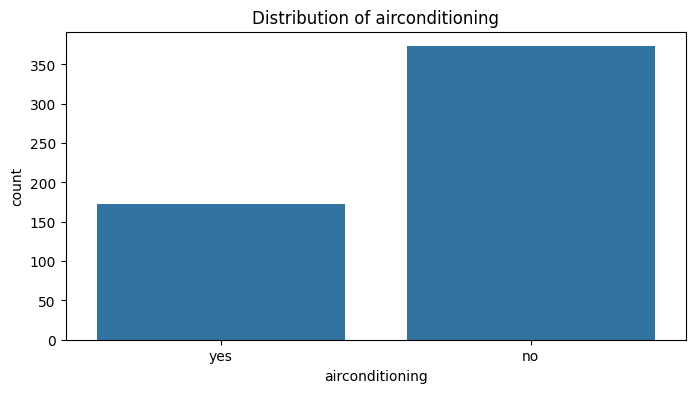

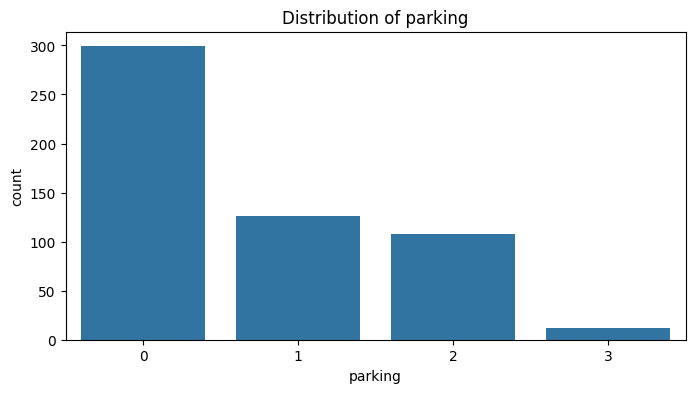

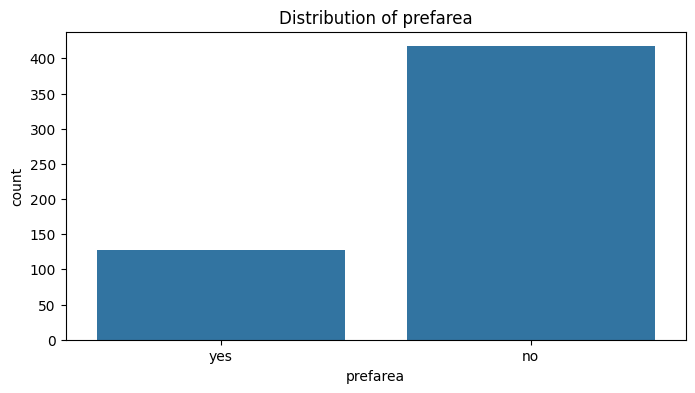

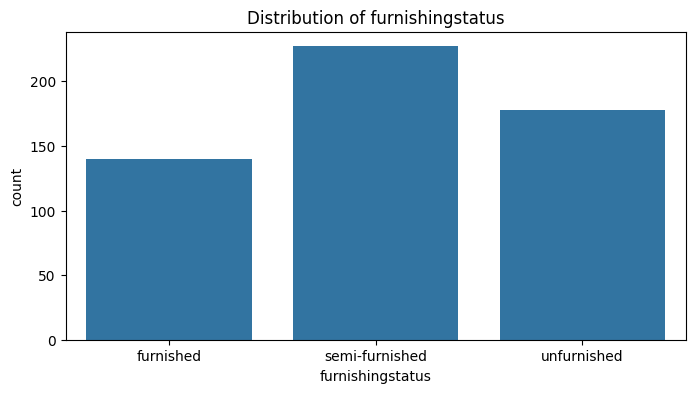

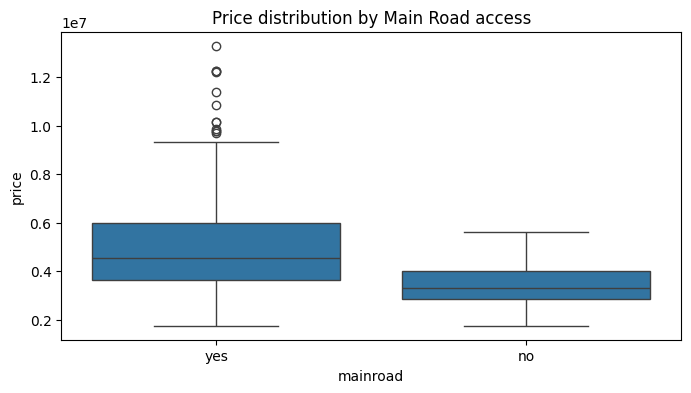

In [14]:
# Numerical columns
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'price']

# Categorical columns
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Numerical summary & plots
print(df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical value counts
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Price vs categorical variable example
plt.figure(figsize=(8,4))
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Price distribution by Main Road access')
plt.show()

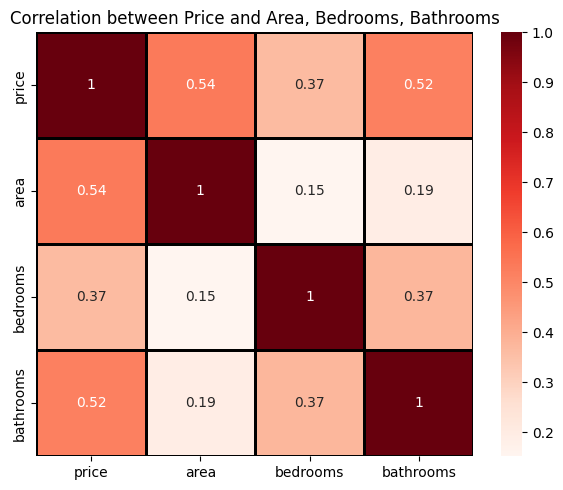

In [19]:
data_plotting = df[['price', 'area', 'bedrooms', 'bathrooms']].corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Reds', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation between Price and Area, Bedrooms, Bathrooms')
plt.tight_layout()
plt.show()

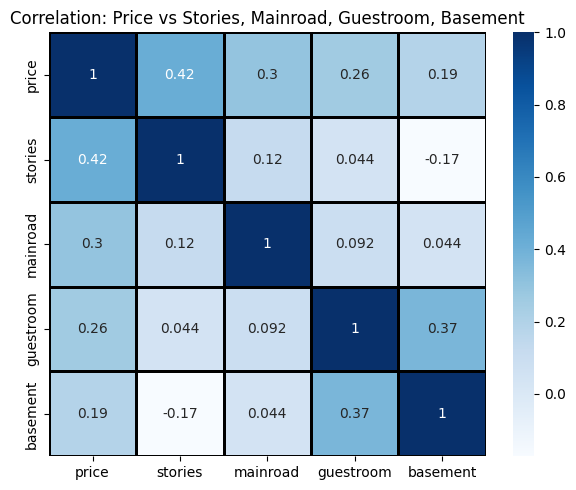

In [20]:
df_encoded = df.copy()
df_encoded['mainroad'] = df_encoded['mainroad'].map({'yes': 1, 'no': 0})
df_encoded['guestroom'] = df_encoded['guestroom'].map({'yes': 1, 'no': 0})
df_encoded['basement'] = df_encoded['basement'].map({'yes': 1, 'no': 0})

data_plotting = df_encoded[['price', 'stories', 'mainroad', 'guestroom', 'basement']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Blues', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation: Price vs Stories, Mainroad, Guestroom, Basement')
plt.tight_layout()
plt.show()

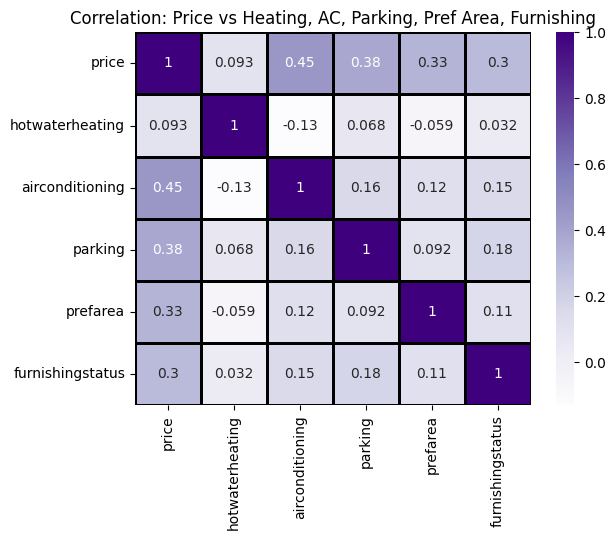

In [21]:
df_encoded = df.copy()
df_encoded['hotwaterheating'] = df_encoded['hotwaterheating'].map({'yes': 1, 'no': 0})
df_encoded['airconditioning'] = df_encoded['airconditioning'].map({'yes': 1, 'no': 0})
df_encoded['prefarea'] = df_encoded['prefarea'].map({'yes': 1, 'no': 0})

df_encoded['furnishingstatus'] = df_encoded['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

cols = ['price', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
correlation = df_encoded[cols].corr()

plt.figure(figsize=(6.5, 5.5))
sns.heatmap(correlation, annot=True, cmap='Purples', linecolor='black', linewidths=1)
plt.title('Correlation: Price vs Heating, AC, Parking, Pref Area, Furnishing')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['area', 'price']] = scaler.fit_transform(df[['area', 'price']])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4.004484,1.757010,4,4,4,yes,no,no,no,yes,3,no,furnished
2,4.004484,2.218232,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3.985755,1.083624,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,3.554979,1.046726,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

for col in X.select_dtypes("bool"):
    X[col] = X[col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,4,2,3,1,0,0,0,1,2,1,2
1,1.757010,4,4,4,1,0,0,0,1,3,0,2
2,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,1.083624,4,2,2,1,0,1,0,1,3,1,2
4,1.046726,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,2,1,1,1,0,1,0,0,2,0,0
541,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-0.705921,2,1,1,1,0,0,0,0,0,0,0
543,-1.033389,3,1,1,0,0,0,0,0,0,0,2


In [35]:
y

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: price, Length: 545, dtype: float64

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)

In [55]:

print("R² (Linear Regression):", r2_score(y_test, y_pred_linear))
print("RMSE (Linear Regression):", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

R² (Linear Regression): 0.6494754192267795
RMSE (Linear Regression): 0.7122893757982468


In [51]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [52]:
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso R²: -0.0179256794248297
Lasso RMSE: 1.2138227211073762


In [49]:
ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [53]:
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge R²: 0.6489461311066762
Ridge RMSE: 0.7128269473608428
